# Regularization with SciKit-Learn

Previously we created a new polynomial feature set and then applied our standard linear regression on it, but we can be smarter about model choice and utilize regularization.

Regularization attempts to minimize the RSS (residual sum of squares) *and* a penalty factor. This penalty factor will penalize models that have coefficients that are too large. Some methods of regularization will actually cause non useful features to have a coefficient of zero, in which case the model does not consider the feature.

Let's explore two methods of regularization, Ridge Regression and Lasso. We'll combine these with the polynomial feature set (it wouldn't be as effective to perform regularization of a model on such a small original feature set of the original X).

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

## Data and Setup

In [2]:
df = pd.read_csv("Advertising.csv")
X = df.drop('sales',axis=1)
y = df['sales']

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Polynomial Conversion

In [4]:
from sklearn.preprocessing import PolynomialFeatures

In [5]:
polynomial_converter = PolynomialFeatures(degree=3,include_bias=False)

In [6]:
poly_features = polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 19)

### Train | Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

----
----

## Scaling the Data

While our particular data set has all the values in the same order of magnitude ($1000s of dollars spent), typically that won't be the case on a dataset, and since the mathematics behind regularized models will sum coefficients together, its important to standardize the features. Review the theory videos for more info, as well as a discussion on why we only **fit** to the training data, and **transform** on both sets separately.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
#help(StandardScaler)

In [12]:
scaler = StandardScaler()

In [13]:
X_train[0]

array([1.93200000e+02, 1.84000000e+01, 6.57000000e+01, 3.73262400e+04,
       3.55488000e+03, 1.26932400e+04, 3.38560000e+02, 1.20888000e+03,
       4.31649000e+03, 7.21142957e+06, 6.86802816e+05, 2.45233397e+06,
       6.54097920e+04, 2.33555616e+05, 8.33945868e+05, 6.22950400e+03,
       2.22433920e+04, 7.94234160e+04, 2.83593393e+05])

In [14]:
X_test[0]

array([7.47000000e+01, 4.94000000e+01, 4.57000000e+01, 5.58009000e+03,
       3.69018000e+03, 3.41379000e+03, 2.44036000e+03, 2.25758000e+03,
       2.08849000e+03, 4.16832723e+05, 2.75656446e+05, 2.55010113e+05,
       1.82294892e+05, 1.68641226e+05, 1.56010203e+05, 1.20553784e+05,
       1.11524452e+05, 1.03171406e+05, 9.54439930e+04])

In [15]:
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_train[0]

array([ 0.49300171, -0.33994238,  1.61586707,  0.28407363, -0.02568776,
        1.49677566, -0.59023161,  0.41659155,  1.6137853 ,  0.08057172,
       -0.05392229,  1.01524393, -0.36986163,  0.52457967,  1.48737034,
       -0.66096022, -0.16360242,  0.54694754,  1.37075536])

In [18]:
X_test = scaler.transform(X_test)

## Ridge Regression

Make sure to view video lectures for full explanation of Ridge Regression and choosing an alpha.

In [19]:
from sklearn.linear_model import Ridge

In [20]:
ridge_model = Ridge(alpha=10)

In [21]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [22]:
test_predictions = ridge_model.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [25]:
MAE

0.5774404204714169

In [26]:
RMSE

0.8946386461319648

How did it perform on the training set? (This will be used later on for comparison)

In [27]:
# Training Set Performance
train_predictions = ridge_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.5288348183025304

### Choosing an alpha value with Cross-Validation

Review the theory video for full details.

In [28]:
from sklearn.linear_model import RidgeCV

In [29]:
# help(RidgeCV)

In [30]:
# Negative RMSE so all metrics follow convention "Higher is better"

# See all options: sklearn.metrics.SCORERS.keys()
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [31]:
# The more alpha options you pass, the longer this will take.
# Fortunately our data set is still pretty small
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [32]:
ridge_cv_model.alpha_

0.1

In [33]:
test_predictions = ridge_cv_model.predict(X_test)

In [34]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [35]:
MAE

0.42737748843510037

In [36]:
RMSE

0.6180719926948979

In [37]:
# Training Set Performance
# Training Set Performance
train_predictions = ridge_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.30941321056569926

In [38]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

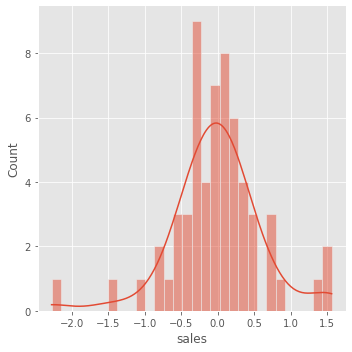

In [39]:
sns.displot(y_test-test_predictions, kde=True, bins=30)


-----

## Lasso Regression

In [40]:
from sklearn.linear_model import LassoCV

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,max_iter=100000)

In [42]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(max_iter=100000)

In [43]:
lasso_cv_model.alpha_

0.004943070909225833

In [44]:
test_predictions = lasso_cv_model.predict(X_test)

In [45]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [46]:
MAE

0.4335034618590078

In [47]:
RMSE

0.6063140748984043

In [48]:
# Training Set Performance
# Training Set Performance
train_predictions = lasso_cv_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.3307056225674498

In [49]:
test_predictions = lasso_cv_model.predict(X_test)

In [50]:
# can see most of the features coeff are zeroes
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [51]:
#b1*x1 + b4*x4
pred = (X_test[:,0]*1.002651 + X_test[:,4]*3.79745279)
pred

array([-0.85804848,  4.94277025, -2.3844921 ,  1.34841625, -4.7186731 ,
       -5.39587664,  5.82802794,  2.58261173, -4.00750638,  5.04442901,
       -3.77291117, -0.78619781, -2.46851603,  7.66304127,  4.19330879,
       -4.12726298, -1.79832468, -4.69044167, -4.7222597 ,  6.59729536,
       -5.29757518,  3.86204443, 12.8555186 ,  9.93446607, -4.42533611,
       -2.89446586,  6.84656495, -4.45282084, -2.11146554, -4.87210316,
       -4.74087432,  5.08511601, -3.6294883 , -5.58504581,  2.90957654,
       -4.65902339, -3.76421043, -4.33222764, -5.34822597, -3.65215157,
       -2.32766682, -3.98674366, -3.20390735, -5.29102391, -2.73225703,
       -3.53112495, -5.73344719,  0.84139338, -1.59006515,  7.04159268,
       -3.44594395, -1.52591952,  0.59994948, -2.61068723, -3.00914463,
       -5.87966678, 10.61262168, -3.64939402,  3.27536589,  0.62318046])

In [52]:
test_predictions

array([14.16203485, 19.2942685 , 12.34178429, 16.97745571,  8.02340978,
        6.95799942, 20.11875833, 17.32880647, 10.43139937, 19.96174466,
        9.56959473, 13.94205676, 11.90851817, 23.35138146, 19.56656277,
        9.27838151, 12.30485359,  9.30152997,  8.56733436, 21.51633564,
        7.06650884, 19.3377222 , 27.28027149, 24.52239173,  9.17172464,
       11.60918126, 20.73841405,  9.29953525, 12.56948515,  8.40051066,
        8.56984613, 20.03587647, 10.83439653,  6.79505173, 18.18820331,
        9.48107219, 10.41803957,  9.70785725,  7.22932328, 10.85467692,
       12.85491418, 10.51648453, 11.26905127,  7.41516944, 11.54705407,
       10.42233031,  6.02782344, 15.36338733, 13.18723611, 22.67619584,
       10.4721906 , 13.01165791, 14.56684361, 11.90062303, 11.47303307,
        5.59404766, 25.06115365,  9.69468957, 17.44771723, 15.60375637])

In [53]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

In [54]:
X_test[0]

array([-0.91339472,  1.76259419,  0.68168558, -0.96397506,  0.01521221,
       -0.29304821,  2.31532893,  1.56001049,  0.36991011, -0.87527811,
       -0.53295016, -0.54312331,  0.43542739,  0.18669917, -0.2012045 ,
        2.77252075,  2.09516506,  0.89465642,  0.09868885])

In [55]:
scaler.fit([test_predictions])

StandardScaler()

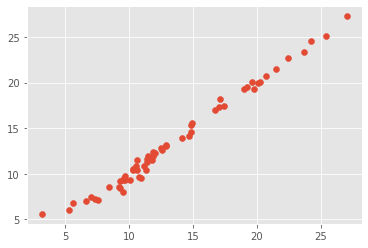

In [56]:
plt.scatter(y_test, test_predictions)

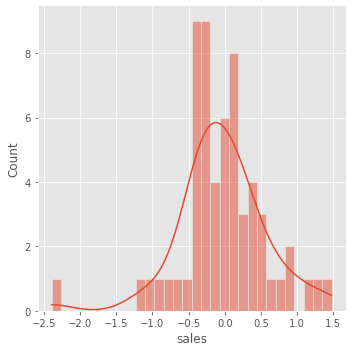

In [57]:
sns.displot(y_test-test_predictions, kde=True, bins=30)

## Elastic Net

Elastic Net combines the penalties of ridge regression and lasso in an attempt to get the best of both worlds!

In [58]:
from sklearn.linear_model import ElasticNetCV

In [59]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01,eps=0.001,n_alphas=100,max_iter=100000)

In [60]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=100000,
             tol=0.01)

In [61]:
elastic_model.l1_ratio_

1.0

In [62]:
test_predictions = elastic_model.predict(X_test)

In [63]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [64]:
MAE

0.5663262117569452

In [65]:
elastic_model.alpha_

0.004943070909225833

In [66]:
RMSE

0.7485546215633726

In [67]:
# Training Set Performance
# Training Set Performance
train_predictions = elastic_model.predict(X_train)
MAE = mean_absolute_error(y_train,train_predictions)
MAE

0.43075829904723684

In [68]:
elastic_model.coef_

array([ 3.78993643,  0.89232919,  0.28765395, -1.01843566,  2.15516144,
       -0.3567547 , -0.271502  ,  0.09741081,  0.        , -1.05563151,
        0.2362506 ,  0.07980911,  1.26170778,  0.01464706,  0.00462336,
       -0.39986069,  0.        ,  0.        , -0.05343757])

-----
---